#### Lesson: Covariance Stationary Processes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quantecon as qe

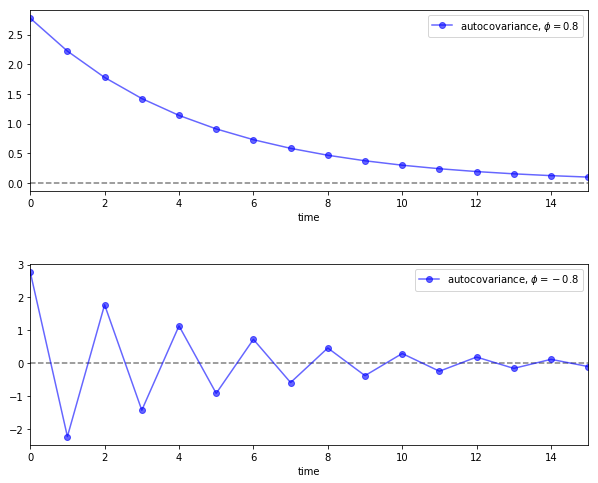

In [2]:
num_rows, num_cols = 2, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

for i, ϕ in enumerate((0.8, -0.8)):
    ax = axes[i]
    times = list(range(16))
    acov = [ϕ**k / (1 - ϕ**2) for k in times]
    ax.plot(times, acov, 'bo-', alpha=0.6,
            label=f'autocovariance, $\phi = {ϕ:.2}$')
    ax.legend(loc='upper right')
    ax.set(xlabel='time', xlim=(0, 15))
    ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)
plt.show()

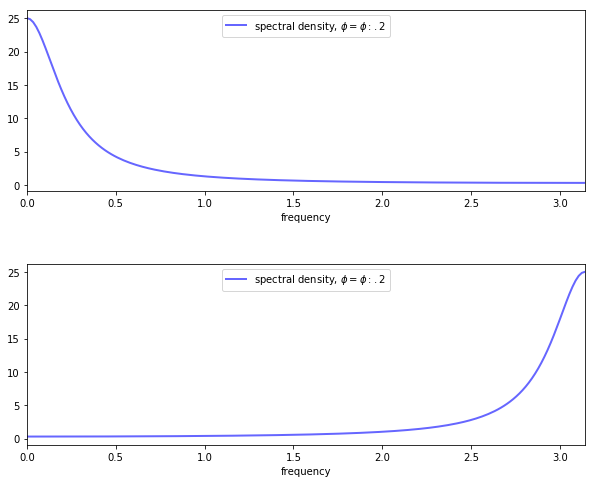

In [3]:
def ar1_sd(ϕ, ω):
    return 1 / (1 - 2 * ϕ * np.cos(ω) + ϕ**2)

ωs = np.linspace(0, np.pi, 180)
num_rows, num_cols = 2, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

# Autocovariance when phi = 0.8
for i, ϕ in enumerate((0.8, -0.8)):
    ax = axes[i]
    sd = ar1_sd(ϕ, ωs)
    ax.plot(ωs, sd, 'b-', alpha=0.6, lw=2,
            label='spectral density, $\phi = {ϕ:.2}$')
    ax.legend(loc='upper center')
    ax.set(xlabel='frequency', xlim=(0, np.pi))
plt.show()

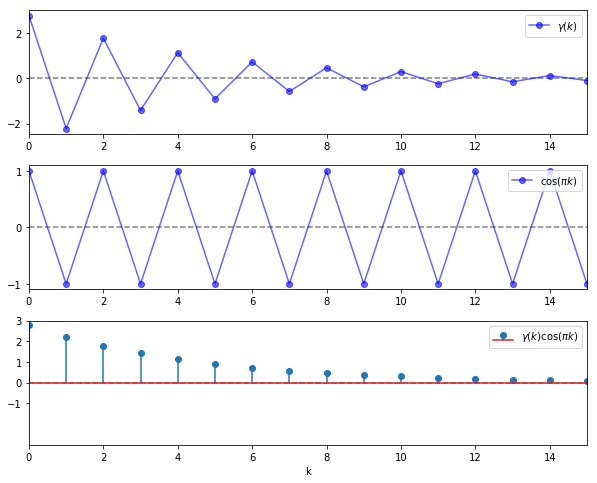

In [4]:
ϕ = -0.8
times = list(range(16))
y1 = [ϕ**k / (1 - ϕ**2) for k in times]
y2 = [np.cos(np.pi * k) for k in times]
y3 = [a * b for a, b in zip(y1, y2)]

num_rows, num_cols = 3, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
plt.subplots_adjust(hspace=0.25)

# Autocovariance when ϕ = -0.8
ax = axes[0]
ax.plot(times, y1, 'bo-', alpha=0.6, label='$\gamma(k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-2, 0, 2))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# Cycles at frequency π
ax = axes[1]
ax.plot(times, y2, 'bo-', alpha=0.6, label='$\cos(\pi k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-1, 0, 1))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# Product
ax = axes[2]
ax.stem(times, y3, label='$\gamma(k) \cos(\pi k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), ylim=(-3, 3), yticks=(-1, 0, 1, 2, 3))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)
ax.set_xlabel("k")

plt.show()